# 1. Importar librerías

In [38]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

from importlib import reload
import utils  # Importa el módulo
reload(utils)  # Recarga el módulo

<module 'utils' from 'c:\\Users\\USUARIO\\OneDrive - Universidad de Antioquia\\Aprendizaje\\Universidad\\2023-2\\Analítica II\\Caso Estudio Supervisado\\pediccion_abandono_empleo\\utils.py'>

# 2. Importar base de datos

In [39]:
df = pd.read_csv('Datasets/datos_limpios.csv')
df.job_level = df.job_level.astype(str)
df.stock_option_level = df.stock_option_level.astype(str)
df.drop(['employee_id'], axis=1, inplace=True)

In [40]:
df.shape

(4401, 26)

# 3. Análisis de correlación

## 3.1. Correlación de variables numéricas

Seleccionar variables numéricas

In [41]:
df_numericas = df.select_dtypes(include=['int64', 'float64'])

Obtener matriz de correlaciones

In [42]:
corr_matrix = df_numericas.corr()
corr_matrix = corr_matrix.apply(lambda x: np.round(x, 3))
corr_matrix

,age,distance_from_home,monthly_income,num_companies_worked,percent_salary_hike,total_working_years,training_times_last_year,years_at_company,years_since_last_promotion,years_with_curr_manager,mean_time
age,1.000,0.007,-0.044,0.299,-0.033,0.681,-0.028,0.311,0.216,0.202,-0.000
distance_from_home,0.007,1.000,-0.022,-0.014,0.039,0.009,-0.010,0.031,0.002,0.021,0.010
monthly_income,-0.044,-0.022,1.000,-0.021,0.004,-0.034,0.050,0.001,0.065,0.024,-0.012
num_companies_worked,0.299,-0.014,-0.021,1.000,0.030,0.239,-0.031,-0.117,-0.036,-0.109,-0.017
percent_salary_hike,-0.033,0.039,0.004,0.030,1.000,-0.019,-0.037,-0.029,-0.029,-0.041,0.026
total_working_years,0.681,0.009,-0.034,0.239,-0.019,1.000,-0.041,0.628,0.404,0.459,-0.012
training_times_last_year,-0.028,-0.010,0.050,-0.031,-0.037,-0.041,1.000,-0.010,0.016,-0.015,-0.007
years_at_company,0.311,0.031,0.001,-0.117,-0.029,0.628,-0.010,1.000,0.618,0.769,-0.021
years_since_last_promotion,0.216,0.002,0.065,-0.036,-0.029,0.404,0.016,0.618,1.000,0.511,-0.010
years_with_curr_manager,0.202,0.021,0.024,-0.109,-0.041,0.459,-0.015,0.769,0.511,1.000,-0.035


Mapa de calor de correlaciones

In [43]:
fig = px.imshow(corr_matrix, text_auto=True)
fig.layout.update(height=700)
fig.show()

Las correlaciones más significativas son:

- Entre edad y total de años trabajando. Con una correlación de 0.68, tiene sentido que los empleados de más edad sean los que lleven más años trabajando.

- Entre total de años trabajando y total de años en la compañía. Los empleados que llevan más años como empleados tienden a ser los que llevan más años en la compañía.

- Entre años en la compañía y años desde la última promoción. Entre más tiempo tenga el empleado en la compañía es más probable que haya pasado mucho tiempo desde su último ascenso.

- Entre años en la compañía y años al mando del jefe actual.

Todas las variables relacionadas con el tiempo de estancia del empleado en la empresa tienen una correlación alta entre ellas. 'years_at_company' y 'years_with_curr_manager' presentan colinealidad y sería bueno eliminar una de estas, veremos qué resultados obtenemos con otros métodos de selección de variables.

## 3.2. Correlación entre la variable objetivo y variables categóricas

Obtener variables categóricas

In [44]:
df_categoricas = df.select_dtypes(include='object')
df_categoricas.columns

Index(['attrition', 'business_travel', 'department', 'education',
       'education_field', 'gender', 'job_level', 'job_role', 'marital_status',
       'stock_option_level', 'environment_satisfaction', 'job_satisfaction',
       'work_life_balance', 'job_involvement', 'performance_rating'],
      dtype='object')

In [45]:
df_corr_cat = utils.corr_cat(df_categoricas).sort_values(by='attrition', ascending=False)
df_corr_cat

,attrition
stock_option_level,3.377544e-01
gender,2.347675e-01
education,2.158986e-01
job_level,1.889185e-01
performance_rating,1.220560e-01
job_involvement,3.424144e-02
job_role,2.365690e-03
department,1.076723e-06
education_field,8.191044e-09
work_life_balance,8.816362e-11


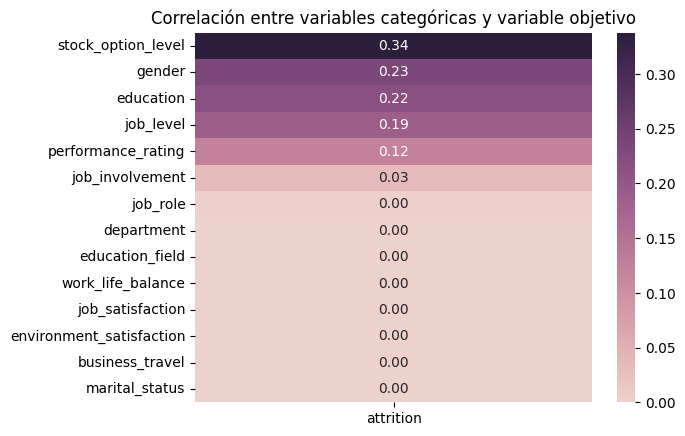

In [46]:
plt.figure()
sns.heatmap(df_corr_cat.iloc[0:-1,:], annot = True, cmap = sns.cubehelix_palette(as_cmap=True), fmt = ".2f")
plt.title("Correlación entre variables categóricas y variable objetivo")
plt.show()

Utilizando un nivel de significancia de 0.05, se puede concluir de las pruebas chi cuadrado que no hay evidencias de que las variables Educación, Género, Nivel del puesto, Nivel de opciones sobre acciones del empleado y Valoración del rendimiento en el último año tienen una correlación significativa con la variable objetivo (el empleado abandonó el año anterior).

## 3.3. Correlación entre la variable objetivo y las variables numéricas independientes

#### Distribuciones por grupo de la variable objetivo (Sí y No)

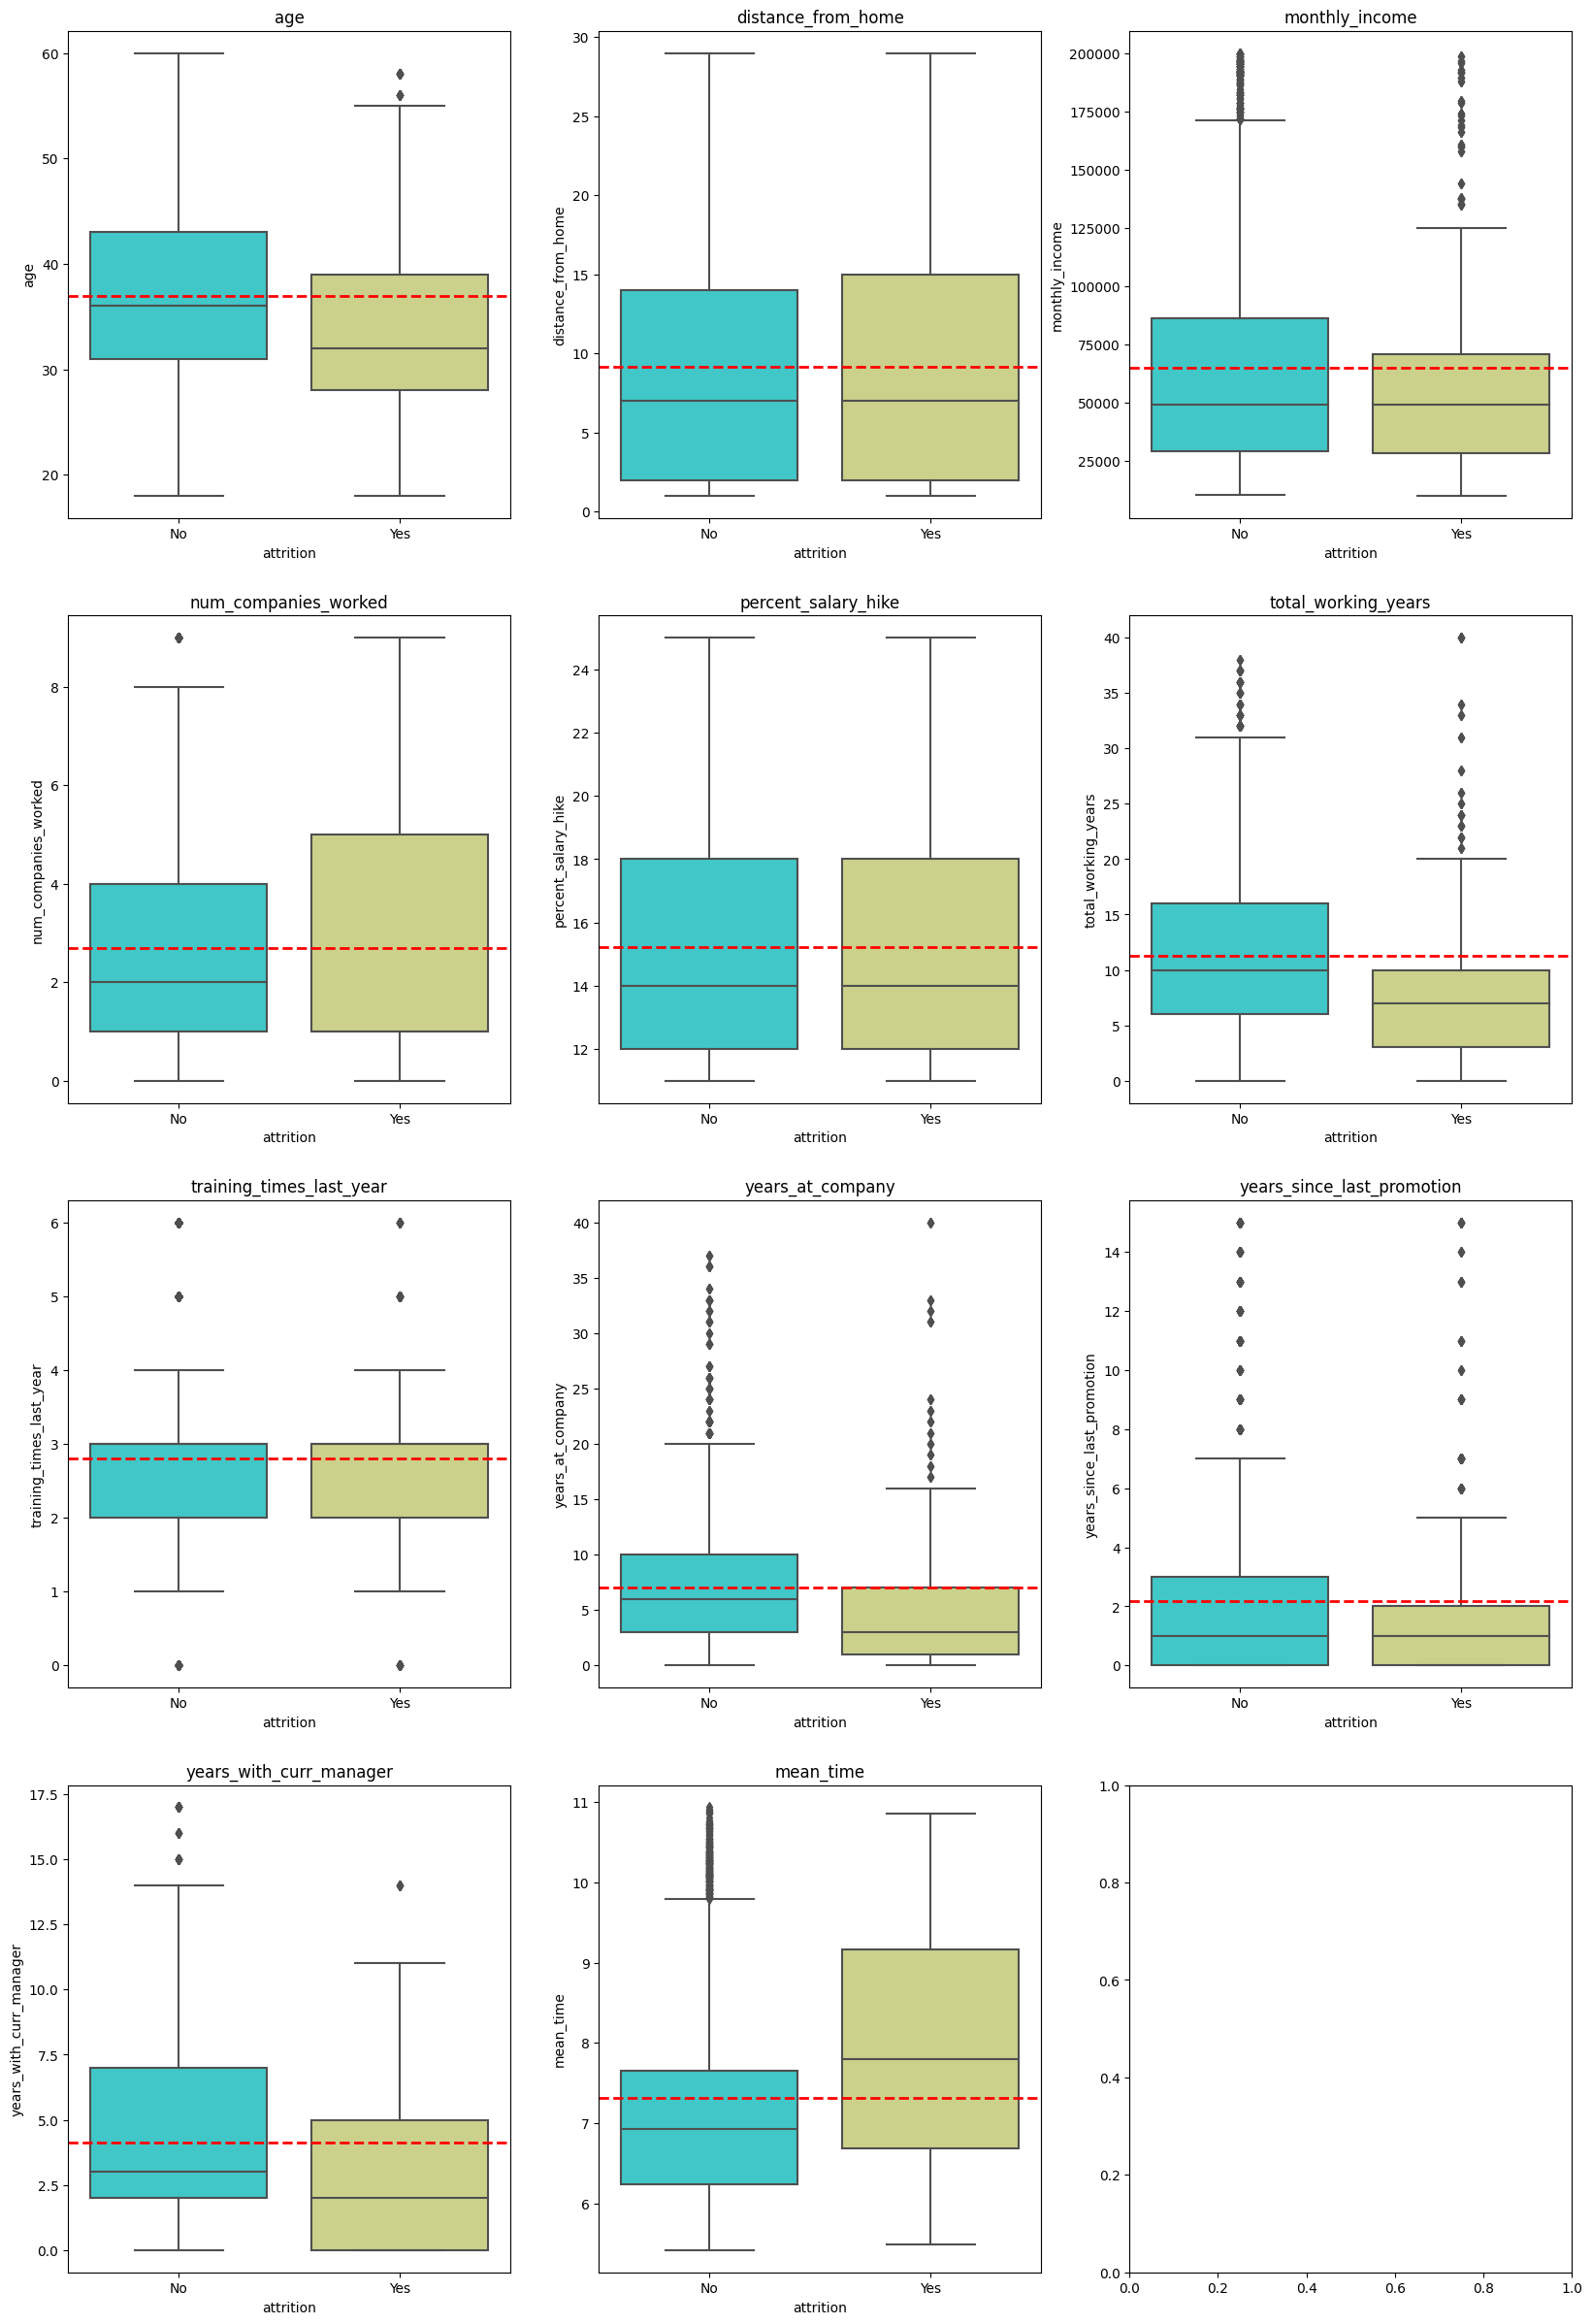

In [47]:
fig, axs = plt.subplots(4, 3, figsize=(20, 30))

rows = [0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5]
cols = [0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2]
variables = df_numericas.columns

for i in range(len(variables)):

    sns.boxplot(x = 'attrition', y = variables[i], data = df, palette='rainbow', ax=axs[rows[i], cols[i]])
    axs[rows[i], cols[i]].set_title(variables[i])
    axs[rows[i], cols[i]].axhline(df[variables[i]].mean(), color='r',linestyle='dashed',linewidth=2)

Las variables distance_from_home, percent_salary_hike y training_times_last_year no presentan diferencias respecto a la variable objetivo, es decir, sus distribuciones son casi iguales para ambas categorías de la variable objetivo. Es decir, la distancia desde casa, el porcentaje de aumento del salario y las veces que fue entrenado el empleado durante el último año no influyen en el abandono del empleado.

La distribución de Edad de los empleados que sí abandonaron su empleado se concentra en edades un poco más bajas comparado con los que No abandonaron, es decir, los que sí abandonaron suelen ser un poco más jóvenes.

La distribución de Ingresos mensuales de los empleados que sí abandonaron su empleado se concentra en Ingresos más bajos comparado con los que No abandonaron, es decir, los que sí abandonaron tenían menos ingresos mensuales. Hay que analizar si esto se debe al rol que desempeñaban en la empresa.

#### Ingresos mensuales por puesto de trabajo y si el empleado abandonó

In [48]:
df1 = df[['attrition','job_role', 'monthly_income']].groupby(['attrition', 'job_role']).mean('monthly_income').reset_index()
fig = px.bar(df1, x='job_role', y='monthly_income', color='attrition', barmode='group')
fig.show()

El gráfico de barras sugiere que en 7 de 9 puestos de trabajo, los empleados que sí abandonaron tenían ingresos mensuales promedio inferiores a los que no abandonaron, a pesar de tener el mismo rol. ¿Será por el tiempo en la empresa?

#### Tiempo promedio de trabajo al día por puesto de trabajo y si el empleado abandonó.

In [83]:
df1 = df[['attrition','job_role', 'mean_time']].groupby(['attrition', 'job_role']).mean('mean_time').reset_index()
fig = px.bar(df1, x='job_role', y='mean_time', color='attrition', barmode='group')
fig.show()

#### Comportamiento de Edad, Años en la empresa e Ingresos mensuales de los empleados que abandonaron

In [59]:
#df2 = df[['attrition', 'years_at_company', 'monthly_income']].groupby([])
fig = px.parallel_coordinates(df.replace({'Yes':1, 'No':0}), color='attrition',
                        dimensions = ['age','years_at_company', 'monthly_income', 'attrition'])
fig.show()

La mayoría empleados que abandonaron su empleo tenían ingresos bajos y tenían 10 años o menos de estar en la empresa. Además, aunque se acumulan un poco más en edades bajas, esta característica sigue estando bastante distribuida.

## 3.4. Conclusiones

- Las variables **Años trabajando**, **Años en la empresa**, **Años desde la última promoción** y **Años a cargo del último jefe** están muy correlacionadas entre ellas, probar modelos solo con **Años en la compañía**.

- **Nivel de opciones sobre acciones**, **Género**, **Educación**, **Nivel del puesto** y **Valoración del rendimiento en el último año** no tienen una relación significativa con la variable objetivo.

- Las variables **Distancia a la casa**, **Porcentaje de aumento de salario** y **Veces que se impartión formación al empleado en el último año** no presentan diferencias respecto a la variable objetivo, es decir, sus distribuciones son casi iguales para ambas categorías de la variable objetivo. Lo anterior nos permite tener presentes estas variables como variables que van a aportar muy poco o nada de información a los modelos.

- En 7 de 9 puestos de trabajo, el promedio de ingresos mensuales de los empleados que sí abandonaron es inferior al promedio de los que no abandonaron, a pesar de tener el mismo rol.

- En todos los puestos de trabajo, el promedio de tiempo de trabajo al día de los empleados que sí abandonaron es mayor al promedio de los empleados que no abandonaron.